<a href="https://colab.research.google.com/github/Zakedu/workbook/blob/AIFFEL-CodingMaster%2Fjinkyu_coma/making_a_prediction_samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

시계열 생성

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print('슝=3')

슝=3


In [2]:
dataset_filepath = "/content/005930.KS.csv"
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4761.183105,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4348.184082,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4379.354004,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4317.015625,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4496.240723,46880000.0


In [3]:
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4761.183105,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4348.184082,74680000.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4379.354004,54390000.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4317.015625,40305000.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4496.240723,46880000.0


In [4]:
ts1 = df['Close']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
2000-01-04    6110.0
2000-01-05    5580.0
2000-01-06    5620.0
2000-01-07    5540.0
2000-01-10    5770.0
Name: Close, dtype: float64

시계열 안정성의 정성적 분석

이제 시계열이 준비되었으므로 시각화를 통해 안정성(Stationarity) 여부를 확인해 보겠습니다.

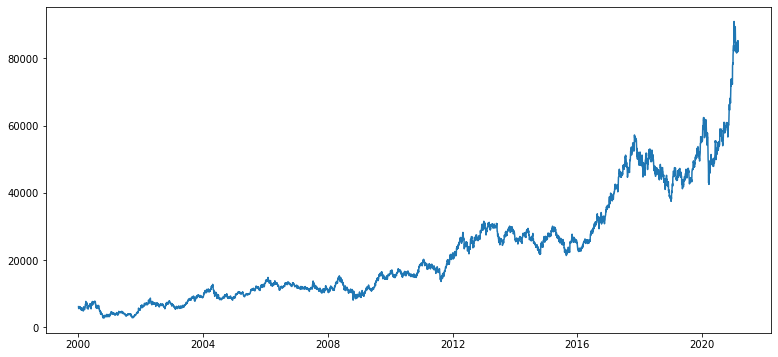

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [6]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Date
2005-01-03   NaN
2017-11-16   NaN
2017-11-23   NaN
2018-01-02   NaN
2018-11-15   NaN
2019-11-14   NaN
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)


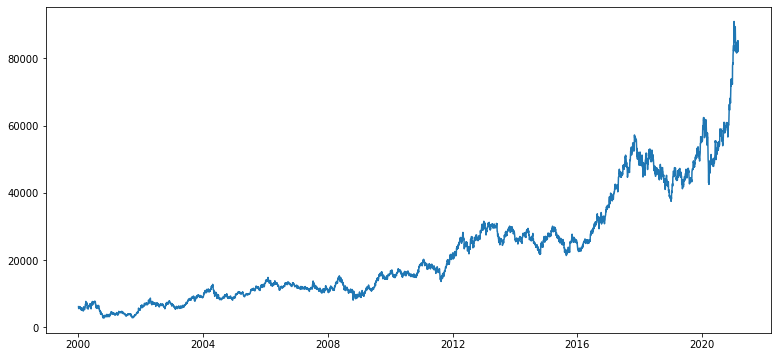

In [7]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


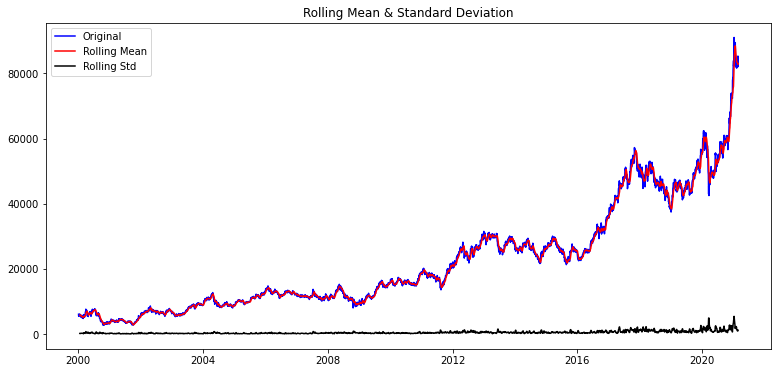

In [9]:
plot_rolling_statistics(ts1, window=12)

다른 데이터에 대해서도 비교해 보자.


Augmented Dickey-Fuller Test

statsmodels 패키지와 adfuller 메소드

In [10]:
!pip install statsmodels

In [11]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


슝=3


In [31]:
augmented_dickey_fuller_test(ts1)

#p-value가 99% 

Results of Dickey-Fuller Test:
Test Statistic                    2.000055
p-value                           0.998673
#Lags Used                       28.000000
Number of Observations Used    5289.000000
Critical Value (1%)              -3.431587
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64


보다 Stationary한 시계열로 가공해 가기


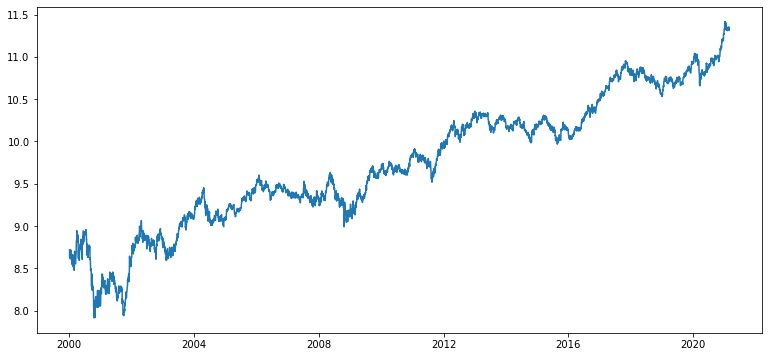

In [14]:
ts_log = np.log(ts1)
plt.plot(ts_log)

In [15]:
augmented_dickey_fuller_test(ts_log)

#p-value 92% 

Results of Dickey-Fuller Test:
Test Statistic                   -0.325391
p-value                           0.921830
#Lags Used                        4.000000
Number of Observations Used    5313.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


Moving average 제거 - 추세(Trend) 상쇄하기

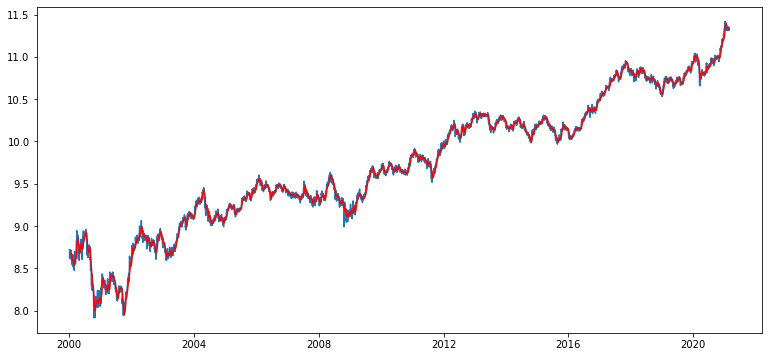

In [17]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [18]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Date
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19    0.024767
2000-01-20    0.039061
2000-01-21    0.007850
2000-01-24   -0.024419
Name: Close, dtype: float64

In [19]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2000-01-19    0.024767
2000-01-20    0.039061
2000-01-21    0.007850
2000-01-24   -0.024419
2000-01-25   -0.069588
2000-01-26   -0.057965
2000-01-27   -0.047001
2000-01-28    0.004477
2000-01-31   -0.035715
2000-02-01   -0.075802
2000-02-02   -0.076542
2000-02-03   -0.085232
2000-02-04   -0.072735
2000-02-07   -0.039679
2000-02-08    0.002573
Name: Close, dtype: float64

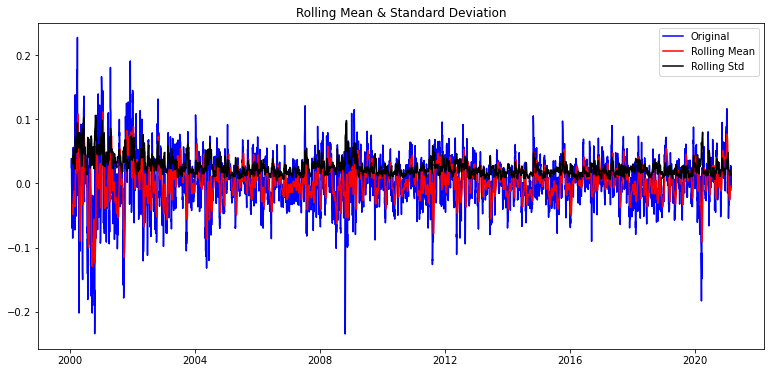

In [20]:
plot_rolling_statistics(ts_log_moving_avg)

In [21]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                -1.664417e+01
p-value                        1.624931e-29
#Lags Used                     1.100000e+01
Number of Observations Used    5.295000e+03
Critical Value (1%)           -3.431586e+00
Critical Value (5%)           -2.862086e+00
Critical Value (10%)          -2.567061e+00
dtype: float64


In [22]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


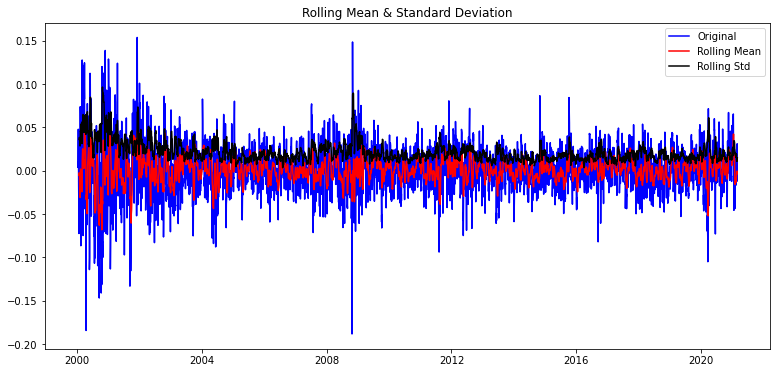

In [23]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [32]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)
#p-value 는 0%

Results of Dickey-Fuller Test:
Test Statistic                  -24.833602
p-value                           0.000000
#Lags Used                        6.000000
Number of Observations Used    5306.000000
Critical Value (1%)              -3.431583
Critical Value (5%)              -2.862085
Critical Value (10%)             -2.567060
dtype: float64


차분(Differencing) - 계절성(Seasonality) 상쇄하기

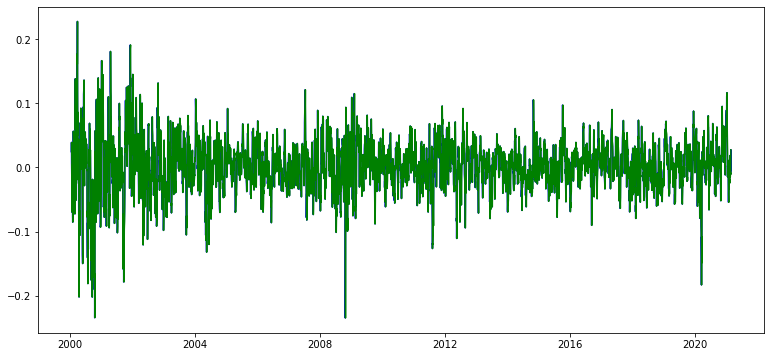

In [25]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

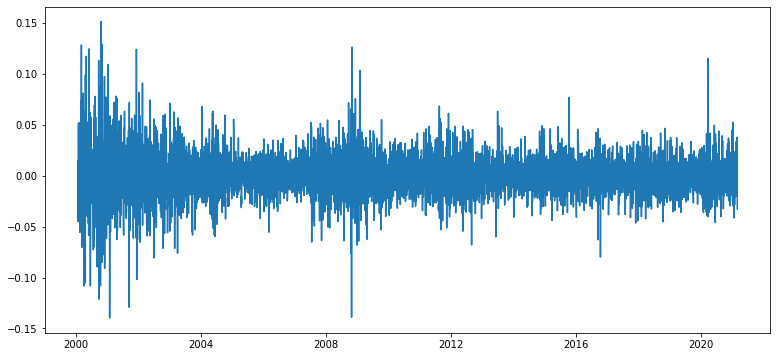

In [26]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

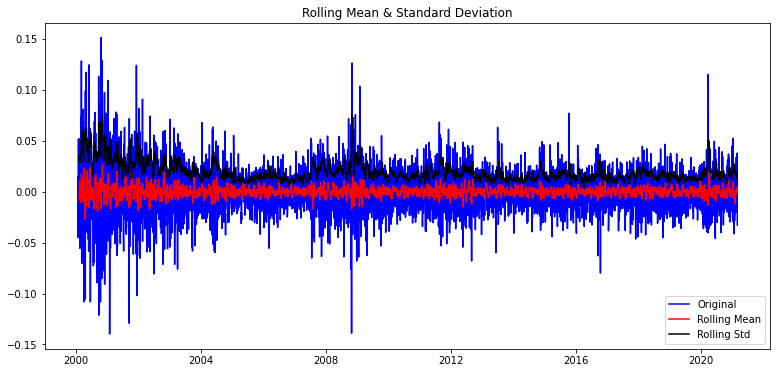

In [27]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [28]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -19.787061
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    5272.000000
Critical Value (1%)              -3.431591
Critical Value (5%)              -2.862088
Critical Value (10%)             -2.567062
dtype: float64


ARIMA 모델의 정의

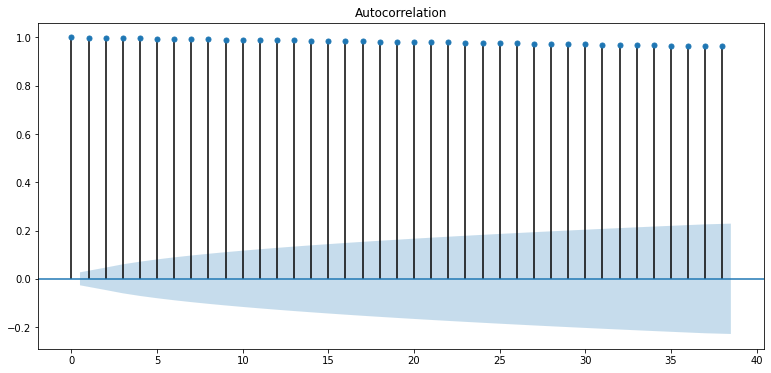

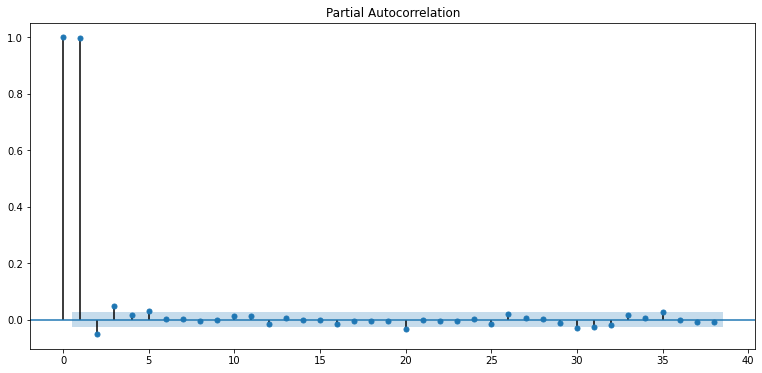

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -40.102097
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    5313.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


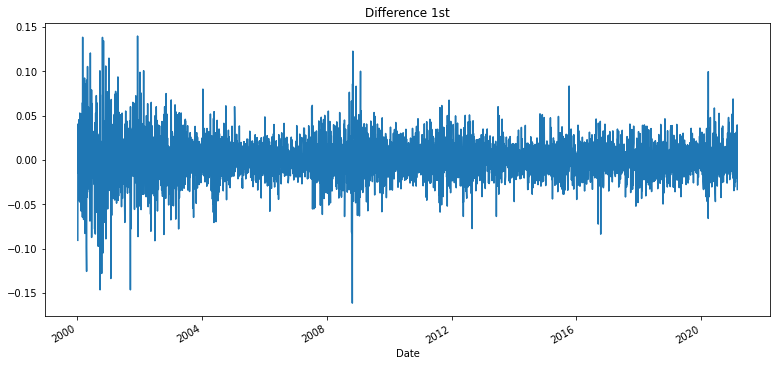

In [39]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                  -21.827893
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    5282.000000
Critical Value (1%)              -3.431589
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64


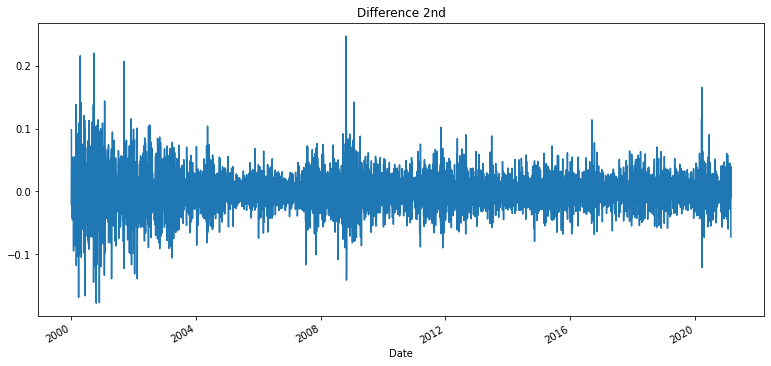

In [40]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

학습데이터 분리

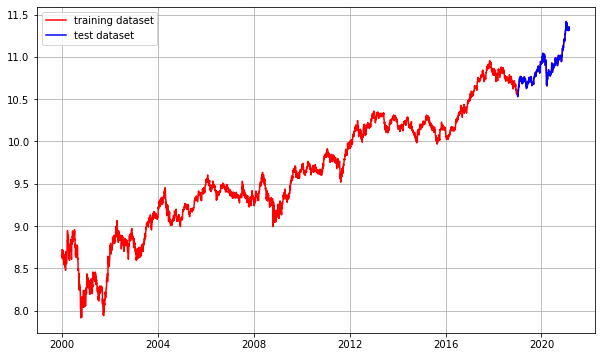

In [41]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [42]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2000-01-04    8.717682
2000-01-05    8.626944
Name: Close, dtype: float64
(4786,)
(532,)


ARIMA model training & expect

In [53]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 2))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4785
Model:                 ARIMA(1, 1, 2)   Log Likelihood               11299.790
Method:                       css-mle   S.D. of innovations              0.023
Date:                Tue, 02 Mar 2021   AIC                         -22589.580
Time:                        06:41:31   BIC                         -22557.214
Sample:                             1   HQIC                        -22578.211
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      1.401      0.161      -0.000       0.001
ar.L1.D.Close     0.6135      0.082      7.494      0.000       0.453       0.774
ma.L1.D.Close    -0.5729      0.082     

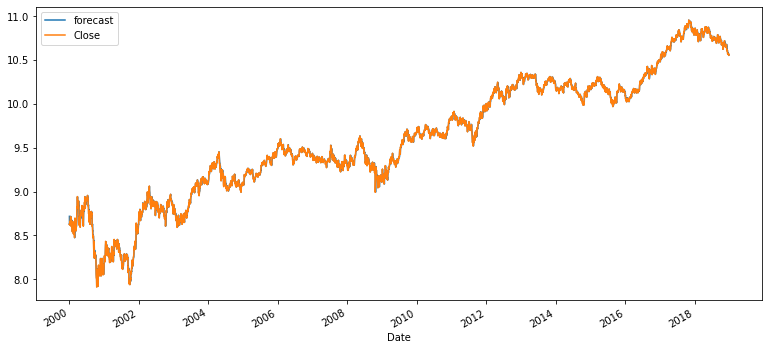

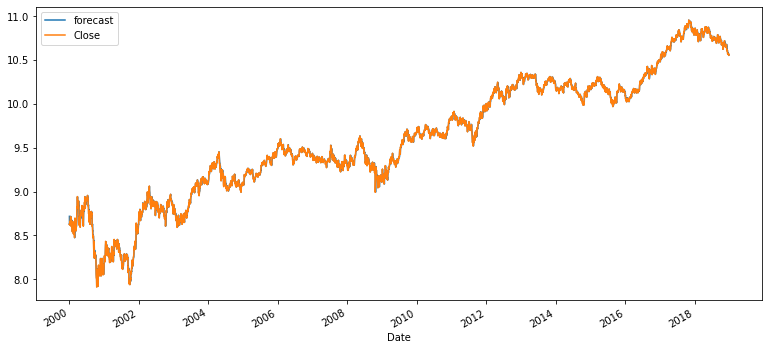

In [54]:
fitted_m.plot_predict()

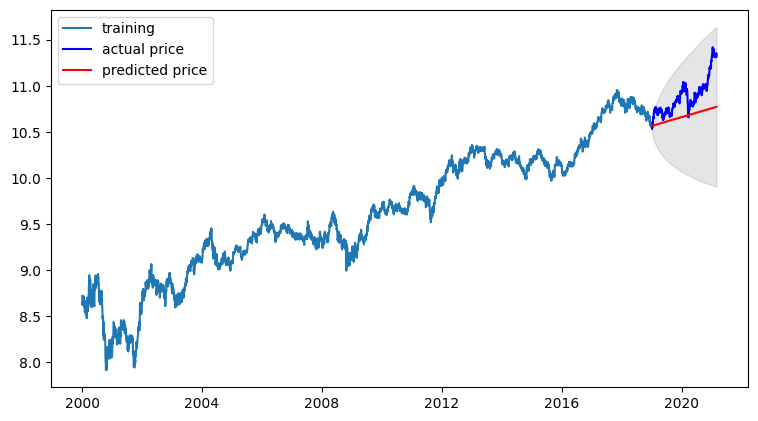

In [55]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  213034418.42778972
MAE:  11236.618258658335
RMSE:  14595.698627602233
MAPE: 18.57%


# 페이스북 API 프로펫 실습


In [ ]:
df1=df.drop(["Open","Low","High","Adj Close","Volume" ],axis=1)

df1.rename(columns = {'Date':'ds','Close':'y'}, inplace=True)
df1.head()

,ds,y
0,2000-01-04,6110.0
1,2000-01-05,5580.0
2,2000-01-06,5620.0
3,2000-01-07,5540.0
4,2000-01-10,5770.0


In [ ]:
# Python
m = Prophet()
m.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5678,2022-02-22
5679,2022-02-23
5680,2022-02-24
5681,2022-02-25
5682,2022-02-26


In [ ]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5678,2022-02-22,69179.732339,63994.579980,74212.228269
5679,2022-02-23,69156.855467,64268.089280,73760.876716
5680,2022-02-24,69106.468059,64383.737665,73992.749786
5681,2022-02-25,69008.132785,63653.154629,73837.033128
5682,2022-02-26,69362.158348,64774.600094,74359.928668


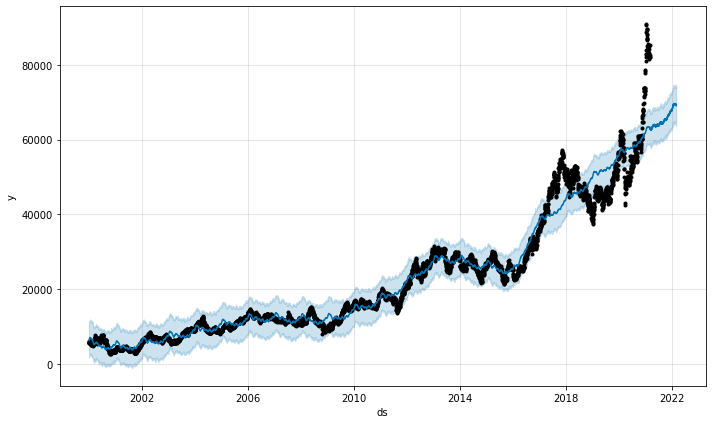

In [ ]:
# Python
fig1 = m.plot(forecast)


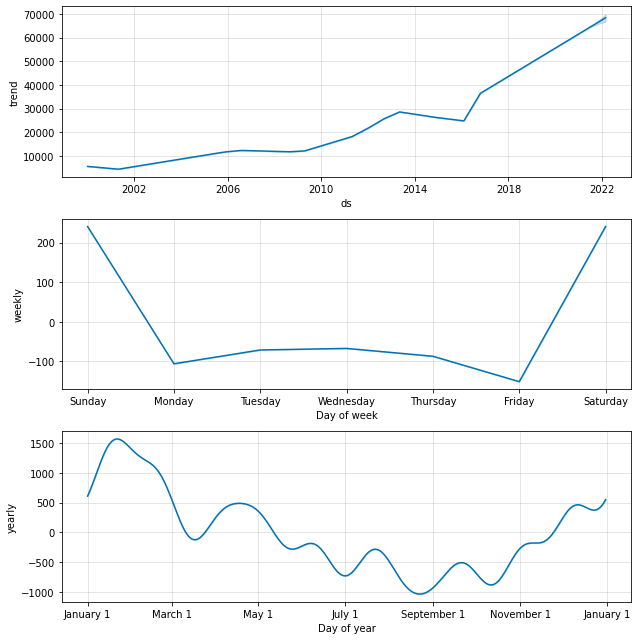

In [ ]:
# Python
fig2 = m.plot_components(forecast)


In [ ]:
# Python
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
# Python
plot_components_plotly(m, forecast)